<a href="https://colab.research.google.com/github/Udhay2898/Pandas_Tutorial_Code/blob/master/CMRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the Data with Dataframe**

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/chennai_metro_rail_limited_chennai.csv')
df.head()

,City,Zone,Division,Corridor Name,Interchange,Station Name,Layout
0,Chennai,12,159,Corridor 1 Green Line,Sub Urban South Line,Chennai Airport,Elevated
1,Chennai,12,159,Corridor 1 Green Line,No,Meenambakkam,Elevated
2,Chennai,Cantonment,Cantonment,Corridor 1 Green Line,No,Nanganallur road,Elevated
3,Chennai,Cantonment,Cantonment,Corridor 1 Green Line,CMRL Blue line,Alandur,Elevated
4,Chennai,12,160,Corridor 1 Green Line,Sub Urban South Line,Gindy,Elevated


**Data Cleaning :**
**Inspect the data**

Finding the data type

In [26]:
df.dtypes

City             object
Zone             object
Division         object
Corridor Name    object
Interchange      object
Station Name     object
Layout           object
dtype: object

**Changing Data type** 2 ways

In [16]:
# 1)
#df['Zone'] = pd.to_numeric(df['Zone'], errors='coerce')

# 2)
#df = df.astype({'Division':'int'})
#df.dtypes

City             object
Zone              int64
Division          int64
Corridor Name    object
Interchange      object
Station Name     object
Layout           object
dtype: object

**Summary statistics for numerical columns:**


In [6]:
df.describe()

,City,Zone,Division,Corridor Name,Interchange,Station Name,Layout
count,34,34,34,34,34,34,34
unique,1,7,25,2,7,33,2
top,Chennai,5,58,Corridor 1 Green Line,No,Alandur,Underground
freq,34,8,3,17,26,2,20


**Checking for missing values:**

In [7]:
df.isnull().sum()

City             0
Zone             0
Division         0
Corridor Name    0
Interchange      0
Station Name     0
Layout           0
dtype: int64

**Data Cleaning**

**Find Duplicates** 2 ways

In [20]:
# 1)
df.duplicated().any()
#2)
df.duplicated()==1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool

**Remove Duplicates**

In [23]:
df = df.drop_duplicates(inplace=True)

In [28]:
# Define colors
colors = ['blue', 'green', 'red', 'purple', 'orange',
          'cyan', 'magenta', 'yellow', 'brown', 'lime',
          'pink', 'teal', 'lavender', 'lightblue', 'darkgreen']


In [36]:
Count_zone = df['Zone'].value_counts().reset_index()
Count_zone.columns = ['Zone','Count_zone']
print(Count_zone)

         Zone  Count_zone
0           5           8
1           8           8
2          12           4
3           9           4
4          10           4
5  Cantonment           3
6          13           3


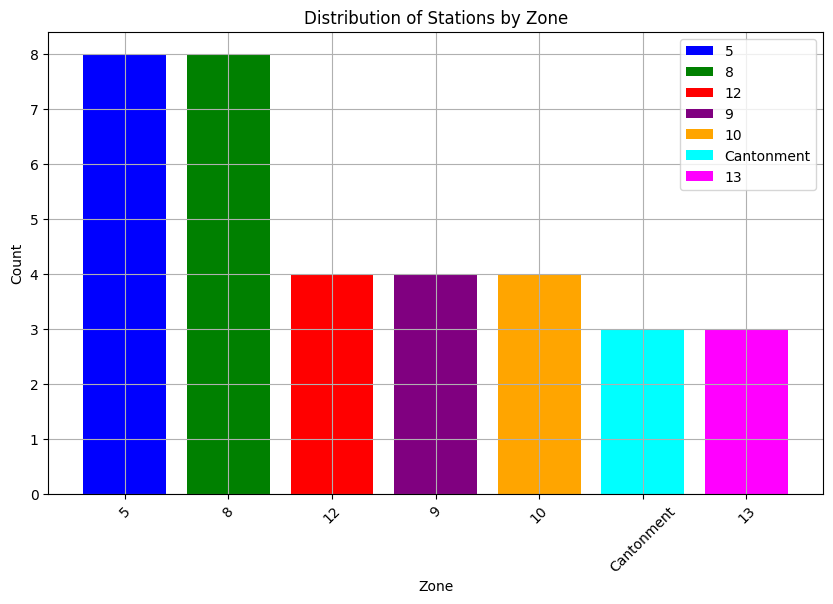

In [55]:
plt.figure(figsize=(10, 6))

# Plotting using a for loop
for i in range(len(Count_zone)):
    plt.bar(Count_zone['Zone'][i],Count_zone['Count_zone'][i], color=colors[i],label=f'{Count_zone["Zone"][i]}')


# Bar Plot: Distribution of Stations by Zone

plt.title('Distribution of Stations by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

**Data Corralation**

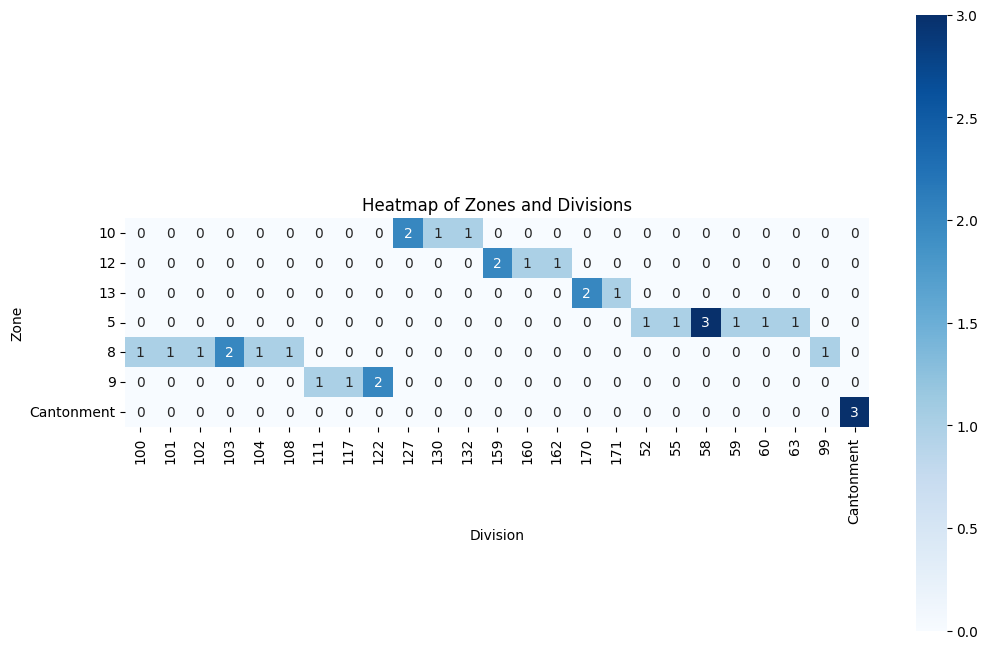

In [67]:
#Heatmap: Relationship Between Zones and Divisions
cross_tab = pd.crosstab(df['Zone'], df['Division'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d',square= True)
plt.title('Heatmap of Zones and Divisions')
plt.xlabel('Division')
plt.ylabel('Zone')
plt.show()

**No of stations in each metrolines**

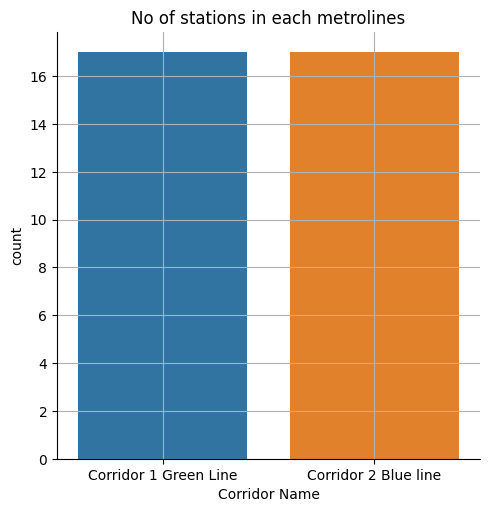

In [57]:
sns.catplot(data=df,x='Corridor Name',kind='count',hue='Corridor Name')
plt.grid(True)
plt.title('No of stations in each metrolines')
plt.show()

**No of stations in zones with their metrolines**

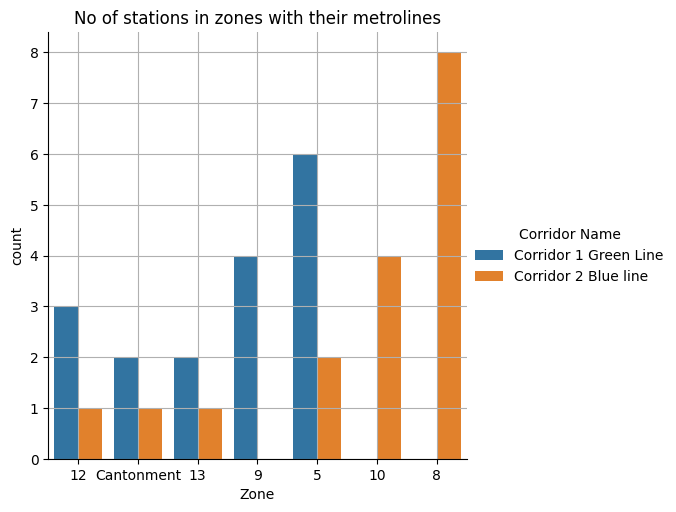

In [58]:
sns.catplot(data=df,x='Zone',kind='count',hue='Corridor Name')

plt.title('No of stations in zones with their metrolines')
plt.grid(True)
plt.show()

**Find the Line with No of Stations**

In [46]:
df['Metro Line'] = np.where(df['Corridor Name'] == 'Corridor 2 Blue line', 'Blue', 'Green')
df['Metro Line'].value_counts()

Metro Line
Green    17
Blue     17
Name: count, dtype: int64

**Show those with Bar Chart**

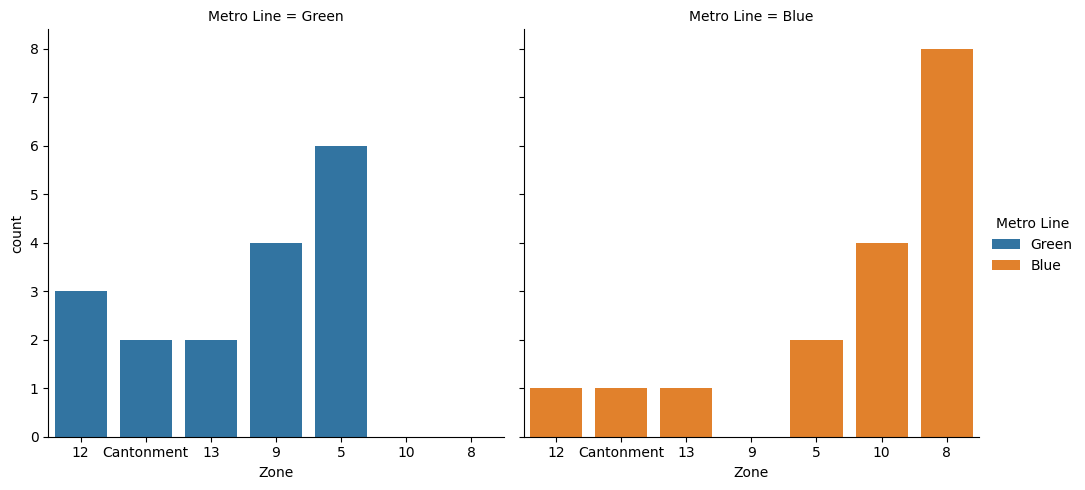

In [65]:
sns.catplot(data=df,x='Zone',kind='count',hue='Metro Line',col='Metro Line')
plt.show()

**Find no of stations with interageabilty and no_interchage facility**

In [75]:
df[df['Interchange_availability'] == 1]['Station Name'].value_counts()

Station Name
Alandur            2
Chennai Airport    1
Gindy              1
Chennai Central    1
St Thomas Mount    1
Egmore             1
Central Metro      1
Name: count, dtype: int64

In [76]:
df['Interchange_availability'] = np.where(df['Interchange'] == 'No', 0, 1)
df.head(2)

,City,Zone,Division,Corridor Name,Interchange,Station Name,Layout,Metro Line,Interchange_availability
0,Chennai,12,159,Corridor 1 Green Line,Sub Urban South Line,Chennai Airport,Elevated,Green,1
1,Chennai,12,159,Corridor 1 Green Line,No,Meenambakkam,Elevated,Green,0


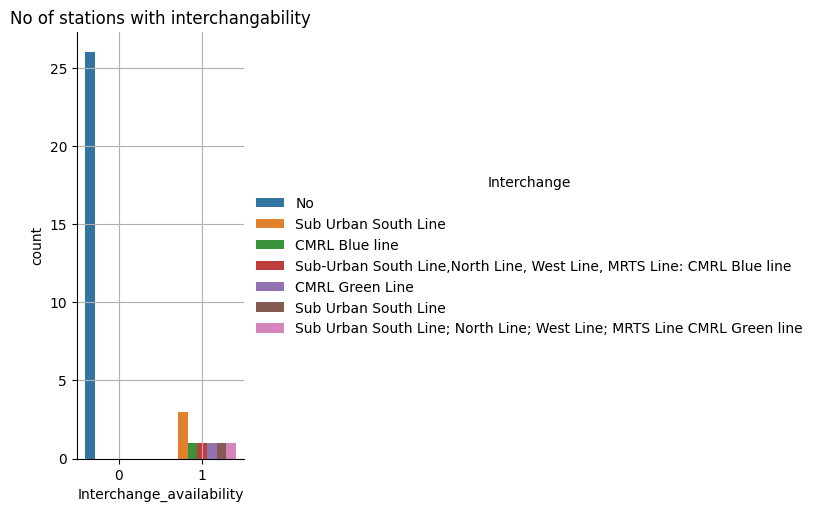

In [79]:
sns.catplot(data=df,x='Interchange_availability', kind='count',hue='Interchange')

plt.grid(True)
plt.title('No of stations with interchangability')
plt.show()